In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge                    #LIBRERIAS NECESARIAS
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

np.random.seed(0) #Con estea semilla podemos volver a generar de la misma forma los datos.

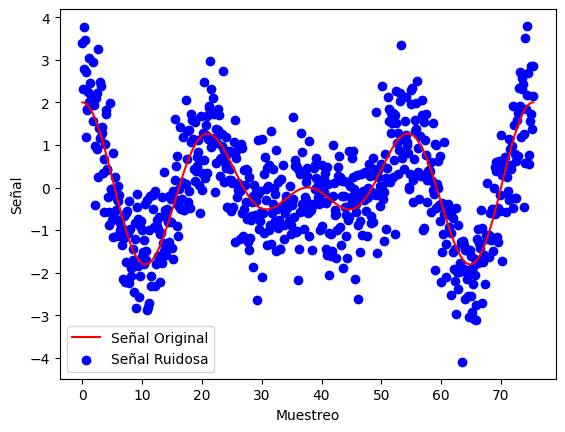

In [11]:
def var_snr(x,snrdB): #Función que entrega el varianza del ruido tomando en cuenta su potencia en dB
    Px = np.mean(x**2)
    return Px/(10**(snrdB/10))

snrdB = 2
N = 700 #Muestras 500 de entrenamiento + 200 de testeo

X = np.linspace(0, 24*np.pi, N)  #array de tiempo
Y_true = np.cos(X/3)+np.cos(X/4)  #señal limpia de cosenos

var_noise = var_snr(Y_true, snrdB) #Hallar varianza del ruido

Y = Y_true + np.random.normal(0, np.sqrt(var_noise), len(X)) #Señal contaminada con ruido gaussiano media 0, varianza var_noise

X = X.reshape(-1,1) #Sklearn sólo entiendo en vectores columna, por esto mismo transformamos los datos de fila a columna
Y = Y.reshape(-1,1)

plt.plot(X, Y_true, c='r', label='Señal Original')
plt.scatter(X, Y, c='b', label='Señal Ruidosa')
plt.legend()
plt.xlabel('Muestreo')
plt.ylabel('Señal')
plt.show()

In [12]:
scaler_X = MinMaxScaler() #Creamos2 dos variables que contienen los modelos de normalización
scaler_Y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X) #Normalizamos los valores en un rango de [0,1]
Y_scaled = scaler_Y.fit_transform(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size=200/N, random_state=42) #Dividimos nuestros datos 500 train 200 test
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

Q = 29
phiQ = PolynomialFeatures(degree=Q)

(500, 1) (200, 1) (500, 1) (200, 1)


## Maxima Verosimilitud

$\hat{\theta} = (\Phi^T\Phi)^{-1} \Phi^T y$

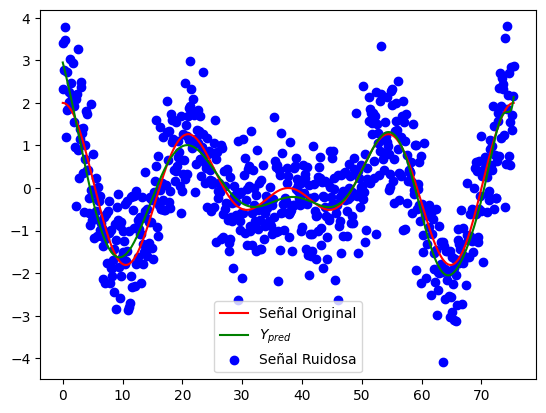

In [13]:

def max_ver(X_train, Y_train, phiQ):
    Phi_train = phiQ.fit_transform(X_train)  # Aplicar la transformación polinomial a los datos X

    return np.linalg.pinv(Phi_train.T @ Phi_train) @ Phi_train.T @ Y_train

X_range = np.linspace(0, 1, 1000).reshape(-1,1)
Phi_test = phiQ.fit_transform(X_range)
theta = max_ver(X_train, Y_train, phiQ)

Y_pred = Phi_test @ theta

plt.plot(X, Y_true, c='r', label='Señal Original')
plt.plot(scaler_X.inverse_transform(X_range), scaler_Y.inverse_transform(Y_pred), c='g', label='$Y_{pred}$')
plt.scatter(X, Y, c='b', label='Señal Ruidosa')
plt.legend()
plt.show()

## Maximo a Posteriori

$W_{map} = (\Phi^T\Phi + \lambda I)^{-1} \Phi^T y$

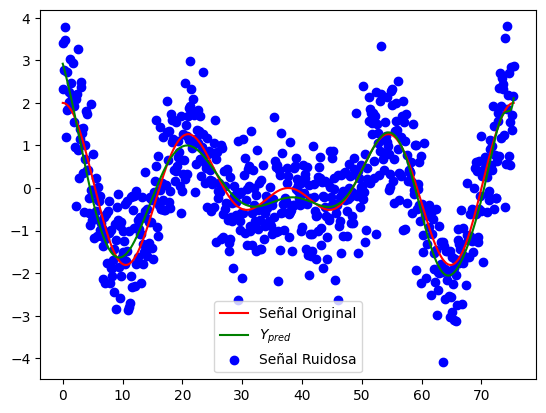

In [14]:
def MAP(X_train, Y_train, alpha, phiQ):
    Phi_train = phiQ.fit_transform(X_train)
    I = np.eye(Phi_train.shape[1])

    return np.linalg.pinv((Phi_train.T @ Phi_train) + (alpha * I)) @ Phi_train.T @ Y_train

X_range = np.linspace(0, 1, 1000).reshape(-1,1)
w = MAP(X_train, Y_train, 1e-13, phiQ)
Phi_test = phiQ.fit_transform(X_range)

Y_pred = Phi_test @ w

plt.plot(X, Y_true, c='r', label='Señal Original')
plt.plot(scaler_X.inverse_transform(X_range), scaler_Y.inverse_transform(Y_pred), c='g', label='$Y_{pred}$')
plt.scatter(X, Y, c='b', label='Señal Ruidosa')
plt.legend()
plt.show()

